# Heart disease prediction with Decision Trees (WORK IN PROGRESS)
The [Heart dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) contains data about patients, some of which have been diagnosed with some kind of heart disease.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import viridis
%matplotlib inline

## Data exploration
Meaning of the features:
- `age`: The person's age in years
- `sex`: The person's sex (1 = male, 0 = female)
- `cp`: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- `trestbps`: The person's resting blood pressure (mm Hg on admission to the hospital)
- `chol`: The person's cholesterol measurement in mg/dl
- `fbs`: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- `restecg`: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- `thalach`: The person's maximum heart rate achieved
- `exang`: Exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- `slope`: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- `ca`: The number of major vessels (0-3)
- `thal`: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- `target`: Heart disease (0 = no, 1 = yes)


In [5]:
dataset = pd.read_csv('datasets/heart.csv')
# describe dataset's variables
dataset.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Percentage of patients with heart disease: 54.46%
Percentage of patients without heart disease: 45.54%


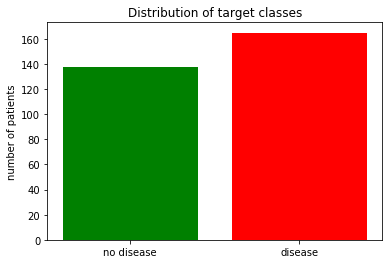

In [6]:
# Visualize the distribution of the target classes
(count_diseases, count_no_diseases) = dataset['target'].value_counts()
print('Percentage of patients with heart disease: {:.2f}%'.format(count_diseases*100 / len(dataset['target'])))
print('Percentage of patients without heart disease: {:.2f}%'.format(count_no_diseases*100 / len(dataset['target'])))

# Display histograms
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color=['red','green'])
plt.title('Distribution of target classes')
plt.xticks(np.asarray(dataset['target'].unique()), ['disease', 'no disease'])
plt.ylabel('number of patients')
plt.show()

### Histograms

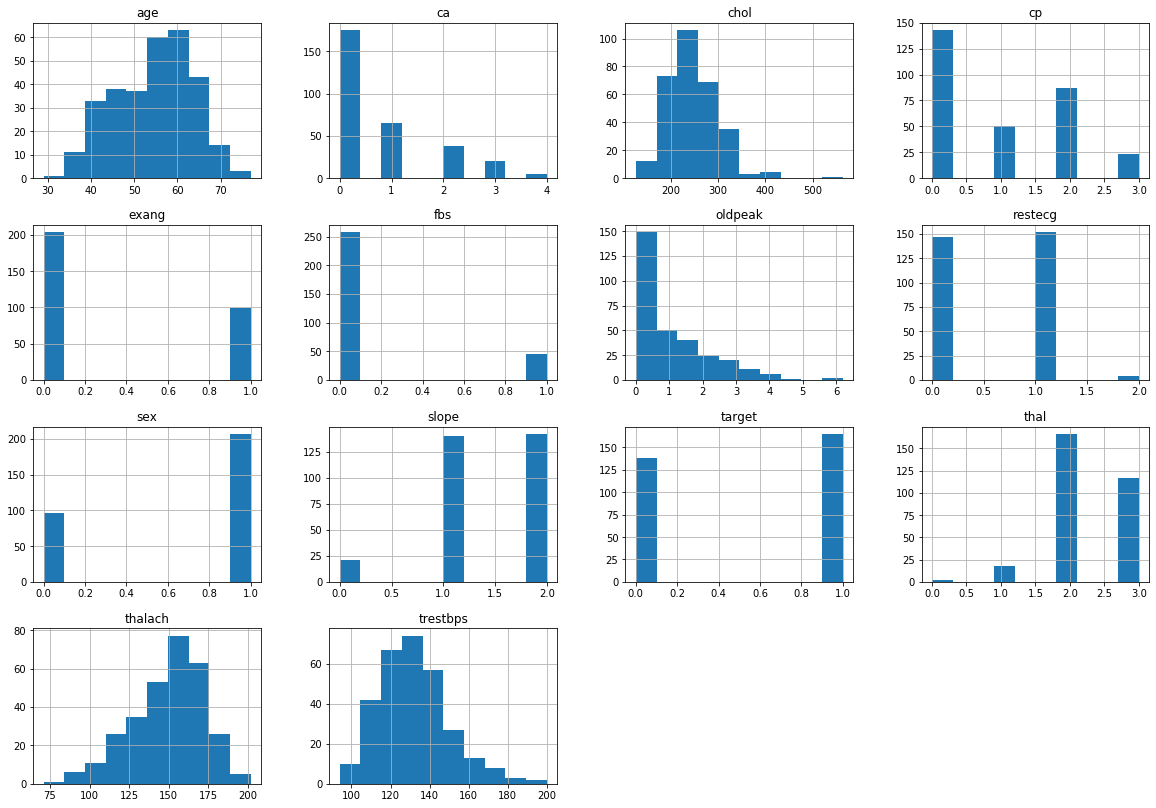

In [7]:
hist = dataset.hist(figsize=(20,14))

### Correlation between variables

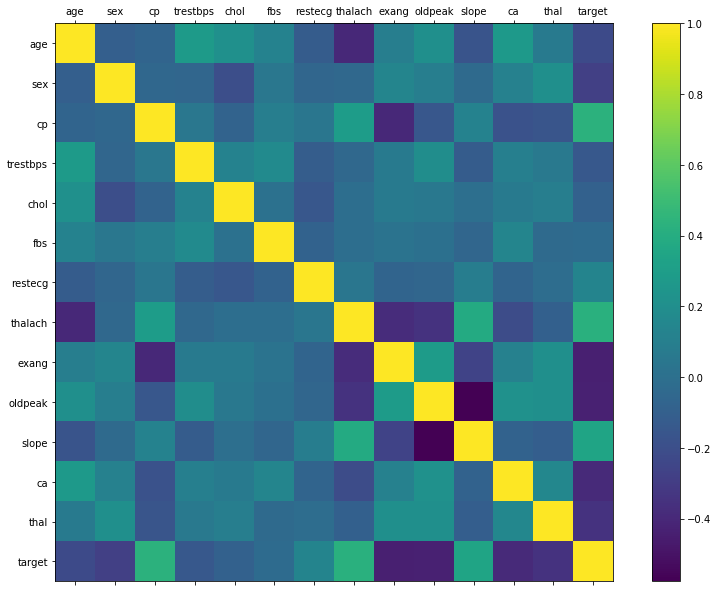

In [39]:
plt.figure(figsize=(14,10))
plt.matshow(dataset.corr(), fignum=1)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()
plt.show()

## Build a model to make predictions: Decision Tree

In [8]:
# separate target from data
y = dataset.pop('target')
X = dataset

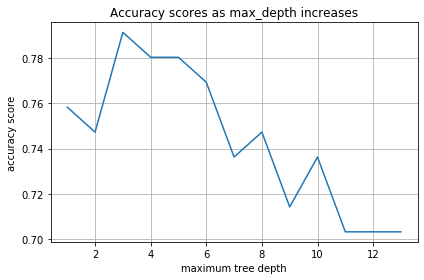

The greatest accuracy score (0.7912) is attained when max_depth = 3


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

min_depth = 1
max_depth = 14
scores = []

# evaluate different tree models varying their maximum depth
for i in range(min_depth, max_depth):
    tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=i,
                              min_samples_split=2,
                              random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test))
    
plt.plot(np.arange(min_depth,max_depth), scores)
plt.title('Accuracy scores as max_depth increases')
plt.xlabel('maximum tree depth')
plt.ylabel('accuracy score')
plt.grid(True)
plt.tight_layout()
plt.show()

scores = np.asarray(scores)
print('The greatest accuracy score ({:.4f}) is attained when max_depth = {}'.format(scores.max(), scores.argmax()+1))

## Build a model to make predictions: Random Forest

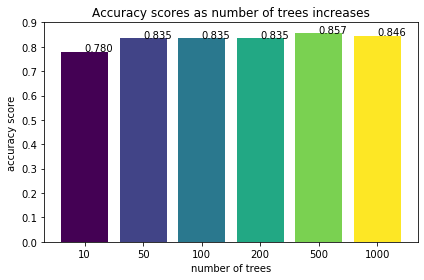

The greatest accuracy score (0.8571) is attained when n_estimators = 500


In [10]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 50, 100, 200, 500, 1000]
scores = []
forests = []

for i in n_estimators: 
    forest = RandomForestClassifier(n_estimators=i,
                                   criterion='gini',
                                   max_depth=5,
                                   max_features='sqrt',
                                   random_state=2)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))
    forests.append(forest)

scores = np.asarray(scores)

colors = viridis(np.linspace(0, 1, len(scores)))
plt.bar(np.arange(len(n_estimators)), scores, color=colors)

for i in range(len(n_estimators)):
    plt.text(i, scores[i], '{:.3f}'.format(scores[i]))
    
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.title('Accuracy scores as number of trees increases')
plt.xlabel('number of trees')
plt.ylabel('accuracy score')
plt.tight_layout()
plt.show()

scores = np.asarray(scores)
print('The greatest accuracy score ({:.4f}) is attained when n_estimators = {}'.format(scores.max(), n_estimators[scores.argmax()]))

## Visualize the decision tree

In [24]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

img_path = './images/decision_trees/project/'

# renaming columns
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']


forest = forests[scores.argmax()].estimators_[1]
feature_names = [i for i in X_train.columns]
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(forest, out_file=(img_path+'forest.dot'),
                feature_names=feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# convert forest.dot into forest.png
from subprocess import call
call(['dot', '-Tpng', img_path+'forest.dot', '-o', img_path+'forest.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = img_path+'forest.png')

> TODO: adjust the datasets values to improve readability (using dummies), and study variables' correlation
[SEE HERE](https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model)